In [9]:
import torch
from rnn_model import EncoderRNN, AttnDecoderRNN
from rnn_model_train import trainIters

import data_preparation as dp
import filepaths as fp
from rnn_model_predict import predict
from plots import showPlot, showAttention

In [2]:
(slang, tlang, index_array_pairs) = dp.prepare_training_data(
    fp.spath_toy, fp.tpath_toy, False)

max_length = 0
for pair in index_array_pairs:
    max_length = max(len(pair[0]), len(pair[1]), max_length)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
hidden_size = 256 #256

encoder1 = EncoderRNN(slang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, tlang.n_words, max_length, dropout_p=0.1).to(device)


In [4]:
plot_losses = trainIters(
    index_array_pairs, encoder1, attn_decoder1,  
    1500, max_length, print_every=150, plot_every=15 )

0m 6s (- 1m 0s) (150 10%) 3.3074
0m 13s (- 0m 55s) (300 20%) 3.1552
0m 20s (- 0m 48s) (450 30%) 3.0242
0m 28s (- 0m 42s) (600 40%) 2.6733
0m 35s (- 0m 35s) (750 50%) 2.2970
0m 44s (- 0m 29s) (900 60%) 1.5511
0m 53s (- 0m 22s) (1050 70%) 0.8027
1m 1s (- 0m 15s) (1200 80%) 0.2202
1m 9s (- 0m 7s) (1350 90%) 0.0950
1m 18s (- 0m 0s) (1500 100%) 0.0567


In [ ]:
for pair in index_array_pairs:
    s_indices = pair[0]
#     print(s_tensor)
    t_indices, a = predict(encoder1, attn_decoder1, s_indices, max_length)
    print(dp.sentenceFromIndexes(tlang, t_indices))
        

<Figure size 432x288 with 0 Axes>

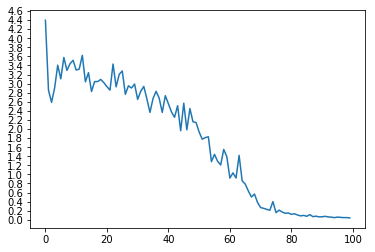

In [5]:
showPlot(plot_losses)


In [ ]:
# TODO: plot loss, fix x-axis labels (100 => 100*plot_iter)
# TODO: detokenizing and true-casing
# TODO: move max_length to data_preparation

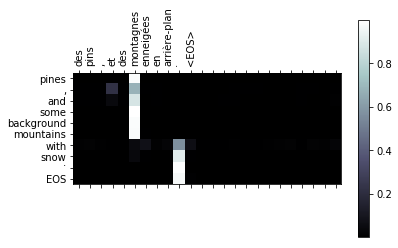

In [17]:
import random

pair = random.choice(index_array_pairs)
s_indices = pair[0]
t_indices, attentions = predict(encoder1, attn_decoder1, s_indices, max_length)

s_sentence = dp.sentenceFromIndexes(slang, s_indices)
t_words = [tlang.index2word[index] for index in t_indices]
showAttention(s_sentence, t_words, attentions)

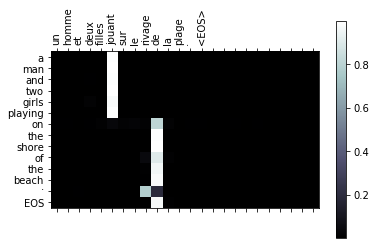